# Sample Hydrolight read

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from hydrolightToolbox.readers import read_h_dfile, read_h_lfile
from hydrolightToolbox.plotters import pcolormesh_polar

import warnings
warnings.simplefilter("ignore")

In [2]:
sd = read_h_dfile("../tesis/objetivos/2_simulacion_espectros/HYDROLIGHT/data/test/digital/Dtest.txt")
sd.to_netcdf("dtest.nc","w")
sd

<xarray.Dataset>
Dimensions:    (theta: 10, phi: 24, zeta: 5, z: 5, zkfcn: 5, bndmu: 10,
                bndphi: 24, omega: 10, wave: 301, waveb: 302, depth: 6)
Coordinates:
  * theta      (theta) float64 87.5 80.0 70.0 60.0 50.0 40.0 30.0 20.0 10.0 0.0
  * phi        (phi) float64 0.0 15.0 30.0 45.0 60.0 ... 300.0 315.0 330.0 345.0
  * zeta       (zeta) float64 0.0 8.134 16.27 24.4 32.53
  * z          (z) float64 0.0 5.0 10.0 15.0 20.0
  * zkfcn      (zkfcn) float64 0.005 5.005 10.01 15.01 20.0
  * bndmu      (bndmu) float64 0.08716 0.2588 0.4226 ... 0.9659 0.9962 1.0
  * bndphi     (bndphi) float64 0.1309 0.3927 0.6545 0.9163 ... 5.629 5.89 6.152
  * omega      (omega) float64 0.02282 0.04494 0.04288 ... 0.007924 0.02391
  * wave       (wave) float64 400.0 401.0 402.0 403.0 ... 698.0 699.0 700.0
  * waveb      (waveb) float64 399.5 400.5 401.5 402.5 ... 698.5 699.5 700.5
  * depth      (depth) float64 -1.0 0.0 5.0 10.0 15.0 20.0
Data variables: (12/47)
    acoef      (wave, z) float64 0.1929 0.1929 0.1929 ... 0.6409 0.6409 0.6409
    acoef1     (wave, z) float64 0.008113 0.008113 0.008113 ... 0.6203 0.6203
    acoef2     (wave, z) float64 0.1341 0.1341 0.1341 ... 0.01992 0.01992
    acoef3     (wave, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    acoef4     (wave, z) float64 0.05059 0.05059 0.05059 ... 0.0007587 0.0007587
    bcoef      (wave, z) float64 1.434 1.434 1.434 1.434 ... 1.428 1.428 1.428
    ...         ...
    Lsky_air   (wave, phi, theta) float64 0.2236 0.1431 ... 0.04575 0.07228
    Lu_water   (wave, z, phi, theta) float64 0.01181 0.01082 ... 1.17e-10
    Ld_water   (wave, z, phi, theta) float64 0.0138 0.01189 ... 1.276e-07
    Rrs        (wave, phi, theta) float64 0.002071 0.002527 ... 0.0005017
    rho        (wave, phi, theta) float64 0.2743 0.2408 ... 0.03512 0.08354
    f-over-Q   (wave, z, phi, theta, depth) float64 0.1851 0.1896 ... 0.08207
Attributes:
    title:    HydroLight Run Title: Replace the rootname and title (27 APR 20...

### Algunos ejemplos

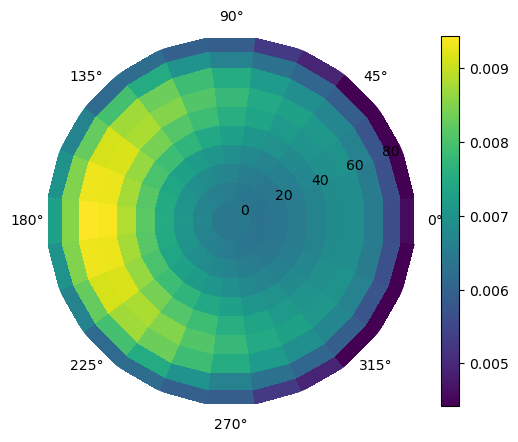

In [4]:
wl = 555
pcolormesh_polar(sd.Rad_Ma.sel(wave=wl))

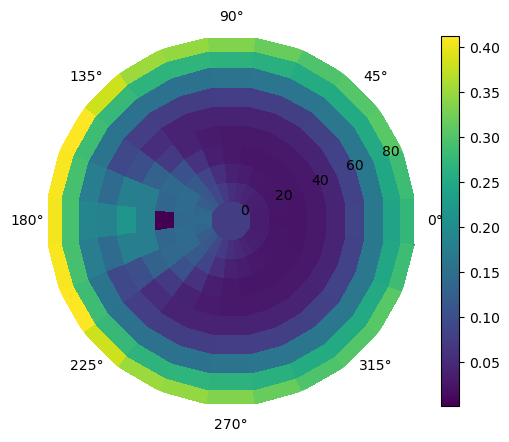

In [5]:
pcolormesh_polar(sd.rho.sel(wave=wl))

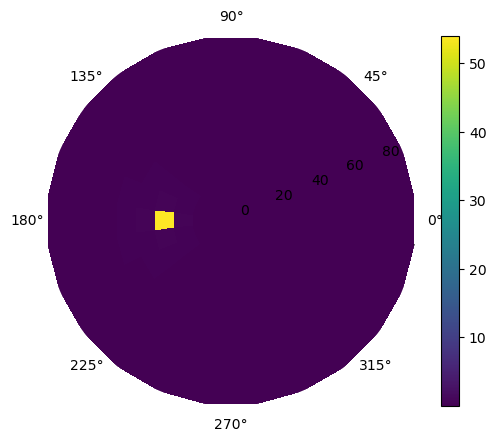

In [6]:
pcolormesh_polar(sd.Rad_0Pa.sel(wave=wl))

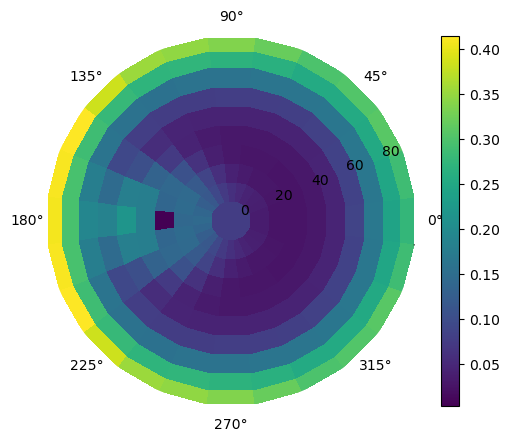

In [7]:
wl = 555


In [8]:
Rrs = pd.read_excel("../tesis/objetivos/2_simulacion_espectros/HYDROLIGHT/data/test/excel/Mtest.xlsx",sheet_name="Rrs", skiprows=3, index_col="in air");
R = pd.read_excel("../tesis/objetivos/2_simulacion_espectros/HYDROLIGHT/data/test/excel/Mtest.xlsx",sheet_name="R", skiprows=3, index_col="wavelen");

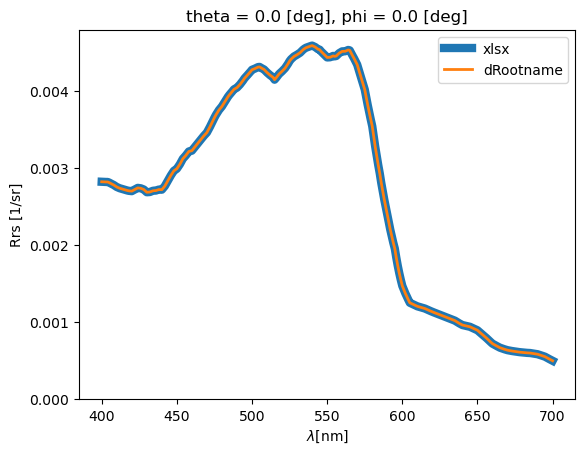

In [9]:
Rrs["Rrs"].plot(label="xlsx", lw=6)
sd.Rrs.sel( theta=0, phi=0).plot(label="dRootname", lw=2)
plt.xlabel(r"$\lambda$[nm]")

plt.ylim(bottom=0)
plt.legend()
plt.show()